# Exploratory Data Analysis

- Eda Lyrics Data Dataframe 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('gdrive/My Drive/lyrics-b.csv')
df.head()

,track_name,artist,genre,track_id,lyrics,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Funeral,Charlotte Day Wilson,Indie,6DpQe7m5AHmIpah83YayrQ,"Funeral Lyrics\nI went to a funeral, just so I...",256941,52,0.334,0.304,-10.341,0.0731,0.90400,0.032800,0.1210,0.0628,99.848
1,Distress,Mad Caddies,Ska,6RYz3pjwTG2xdXfdEJ9EnY,Distress LyricsHeard my favorite song on the r...,229867,29,0.759,0.571,-7.080,0.0523,0.19200,0.000049,0.0997,0.9700,131.796
2,Hot Cross Buns,The Hit Crew Kids,Children's Music,39VrphJ67QSVodEugHmM80,"B Magic vs. Ave Lyrics\nSee, Ave wit’ the Cave...",46467,0,0.887,0.482,-12.383,0.0558,0.46500,0.000000,0.1510,0.8150,125.336
3,Golden Ticket,1K Phew,Hip-Hop,5lwZu0XiSEIPI1NpiqnUer,Golden Ticket Lyrics\nBounce Gang\nFinally bac...,173024,46,0.869,0.510,-10.349,0.3120,0.02270,0.000005,0.1100,0.5160,130.078
4,Dear Rodeo,Cody Johnson,Rock,5S8TnsIYMVrUg1bKxiGf6e,Dear Rodeo Lyrics\nDear Rodeo\nI'd be lying if...,254653,59,0.482,0.654,-5.268,0.0265,0.00881,0.000164,0.1110,0.3530,146.192


In [4]:
df.shape

(18628, 16)

In [5]:
df.dtypes

track_name           object
artist               object
genre                object
track_id             object
lyrics               object
duration_ms           int64
popularity            int64
danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object

In [6]:
#Describe the data
df.describe()

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1.862800e+04,18628.000000,18628.000000,18628.000000,18628.000000,18628.000000,18628.000000,18628.000000,18628.000000,18628.000000,18628.000000
mean,2.320686e+05,45.383026,0.588455,0.625802,-7.911672,0.118100,0.286849,0.070685,0.210761,0.484811,120.031474
std,9.599756e+04,16.695010,0.164378,0.225432,4.020948,0.168887,0.307085,0.205409,0.188979,0.244963,30.410093
min,1.700000e+04,0.000000,0.061700,0.000267,-40.027000,0.022200,0.000002,0.000000,0.010500,0.000000,32.451000
25%,1.885835e+05,35.000000,0.480000,0.472000,-9.668000,0.036200,0.025600,0.000000,0.097600,0.289000,95.291250
50%,2.211265e+05,48.000000,0.598000,0.651000,-6.999000,0.052900,0.155000,0.000010,0.130000,0.474000,118.609500
75%,2.607600e+05,57.000000,0.708000,0.807000,-5.188000,0.116000,0.499250,0.002810,0.264000,0.678000,140.040250
max,5.488000e+06,99.000000,0.975000,0.999000,1.342000,0.965000,0.996000,0.992000,1.000000,0.986000,220.041000


In [7]:
#Find the duplicates
df.duplicated().sum()

0

In [8]:
#Find null values
df.isnull().sum()

track_name          0
artist              0
genre               0
track_id            0
lyrics              0
duration_ms         0
popularity          0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [9]:
df.corr()

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.014765,-0.138058,0.006134,-0.029038,-0.018450,-0.035462,0.092183,0.059567,-0.153321,-0.000829
popularity,0.014765,1.000000,0.146497,0.093267,0.248025,-0.164002,-0.242923,-0.132538,-0.179899,-0.065748,0.026346
danceability,-0.138058,0.146497,1.000000,0.050833,0.160990,0.093887,-0.151355,-0.179155,-0.116154,0.426804,-0.119179
energy,0.006134,0.093267,0.050833,1.000000,0.760626,0.085102,-0.645652,-0.166929,0.172854,0.315912,0.167113
loudness,-0.029038,0.248025,0.160990,0.760626,1.000000,-0.101326,-0.604650,-0.312076,-0.000028,0.224826,0.167263
speechiness,-0.018450,-0.164002,0.093887,0.085102,-0.101326,1.000000,0.198431,-0.119670,0.454953,-0.015795,-0.078754
acousticness,-0.035462,-0.242923,-0.151355,-0.645652,-0.604650,0.198431,1.000000,0.140299,0.077858,-0.185519,-0.175992
instrumentalness,0.092183,-0.132538,-0.179155,-0.166929,-0.312076,-0.119670,0.140299,1.000000,-0.059976,-0.162293,-0.033241
liveness,0.059567,-0.179899,-0.116154,0.172854,-0.000028,0.454953,0.077858,-0.059976,1.000000,-0.031292,-0.046707
valence,-0.153321,-0.065748,0.426804,0.315912,0.224826,-0.015795,-0.185519,-0.162293,-0.031292,1.000000,0.054644


In [10]:
# Top 20 popular songs
df.sort_values(by=['popularity'], ascending=False)[['track_name', 'artist','popularity']].head(20)

,track_name,artist,popularity
17076,Wow.,Post Malone,99
14516,Sweet but Psycho,Ava Max,97
357,ZEZE (feat. Travis Scott & Offset),Kodak Black,93
1832,Drip Too Hard (Lil Baby & Gunna),Lil Baby,92
9123,NASA,Ariana Grande,91
18038,Don't Call Me Up,Mabel,91
7595,Sucker,Jonas Brothers,91
18480,Adictiva,Daddy Yankee,91
8028,Arms Around You (feat. Maluma & Swae Lee),XXXTENTACION,90
16736,no tears left to cry,Ariana Grande,90


In [11]:
df['genre'].value_counts()

Indie               996
Hip-Hop             972
Alternative         966
Rap                 950
Folk                930
Children’s Music    929
Pop                 929
Rock                926
R&B                 905
Soul                887
Dance               859
Country             854
Blues               853
Reggaeton           812
Ska                 794
Reggae              761
Electronic          709
World               692
Jazz                614
Comedy              595
Anime               448
Movie               435
Children's Music    389
Soundtrack          205
Classical           147
Opera                66
A Capella             5
Name: genre, dtype: int64

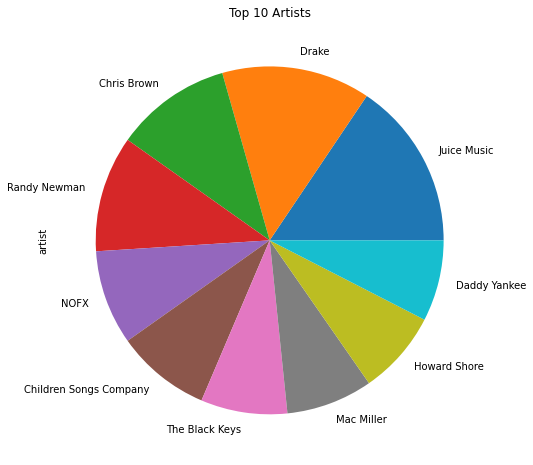

In [12]:
df['artist'].value_counts().nlargest(10).plot(kind='pie',figsize=(14,8),
                                    title="Top 10 Artists")

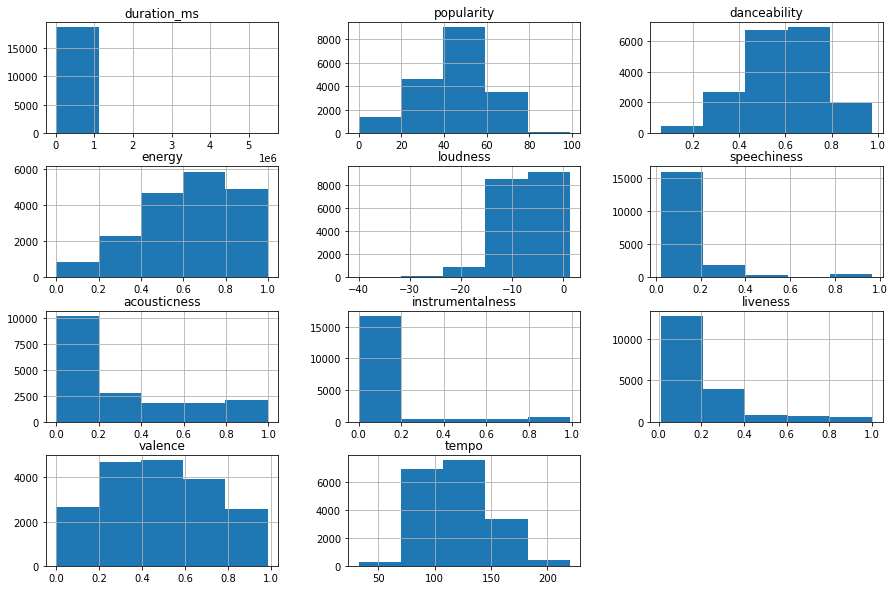

In [13]:
hist = df.hist(bins = 5, figsize = (15,10))